In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(10)

# Intro
torch是目前流行的深度学习框架，是一个从数据加载到模型训练和调试的一条龙解决方案。

torch基于计算图模型（为了实现自动求导，即每个tensor是图上的变量或中间结果)

torch提供的feature包括：自动求导（backward())，自动更新参数(optim)，现成的building blocks(nn.XXX包括loss和model），GPU支持，数据加载(utils.data.DataLoader)

# Tensor 
张量是torch中最基本的数据单元,

torch中计算要求所有输入，输出，中间过程都是tensor，tensor中具有创建它的信息（即若z=x+y，则z会携带指向x和y的指针，以及x和y得到z的运算符），因此可以实现自动求导

在torch中，我们将model定义为一个从输入tensor到输出tensor的带参数映射，形式化定义为：y_pred = model(x)，其中x和y_pred都是tensor

从程序角度看，程序=数据+逻辑，而在torch，tensor就是其数据部分，包括初始数据和中间结果，都是由tensor表示，

一般而言，模型参数tensor需要设置requires_grad=True，才能对其保留其求导结果
> requires_grad=True后，tensor会多占一个单位的内存，用于保存反向求导时的求导结果，才能在后面利用求导结果对其进行参数更新

以下面代码为例，可以看出tensor是torch运算的基本单位
```python
x = torch.rand(20, 1) * 10
y = 2*x + (5+torch.randn(20, 1))

w = torch.randn((1), requires_grad=True)
b = torch.randn((1), requires_grad=True)

wx = torch.mul(w, x)
y_pred = torch.add(wx, b)
```
其中x, y为构造的输入，是tensor

w, b为模型参数，是tensor

wx 为中间结果，也是tensor

y_pred为模型输出，也是tensor

# 示例

下面我们展示一个线性回归的基本示例，注意值得改进的地方包括：
1. loss可以使用nn.XXXLoss中现成的building blocks
2. 参数可以使用torch.optim.xxx完成自动更新

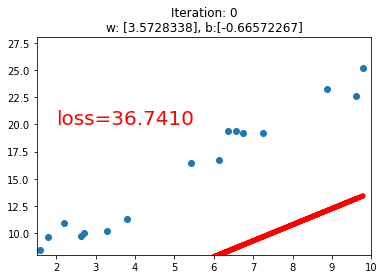

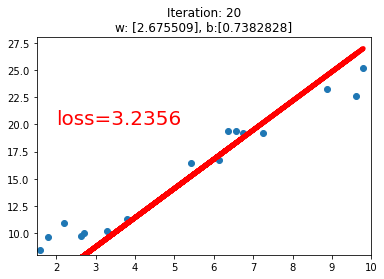

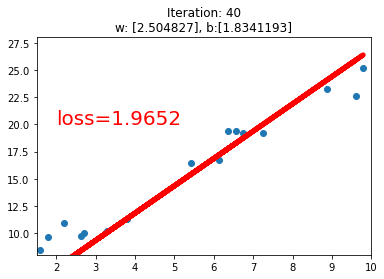

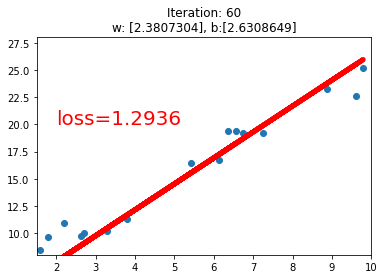

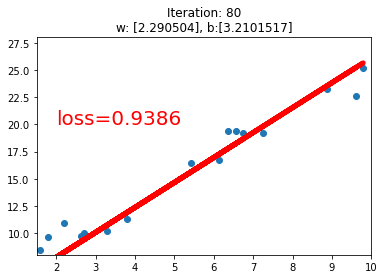

In [5]:
lr = 0.05

x = torch.rand(20, 1) * 10
y = 2*x + (5 + torch.randn(20, 1))

# the two trianable tensors
w = torch.randn((1), requires_grad=True)
b = torch.randn((1), requires_grad=True)

for iteration in range(1000):
    # forward 
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)
    
    # loss 
    loss = (0.5 * (y - y_pred) ** 2).mean()
    
    # backpropagation, this operations will set grad for all trainable tensors
    loss.backward()
    
    # update parameter with grad
    b.data.sub_(lr*b.grad)
    w.data.sub_(lr*w.grad)
    
    # be careful to reset grad for trainable tensors after each update parameters
    w.grad.zero_()
    b.grad.zero_()
    
    if iteration % 20 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20,  'loss=%.4f' % loss.data.numpy(), fontdict={'size':20, 'color':'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {}, b:{}".format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)
        
        if loss.data.numpy() < 1:
            break